In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../data/playground_data.csv").fillna("")

In [40]:
hb_order = [
    "Genesis", "Exodus", "Leviticus", "Numbers", "Deuteronomy",   # Torah
    "Joshua", "Judges", "1_Samuel", "2_Samuel", "1_Kings", "2_Kings", 
    "Isaiah", "Jeremiah", "Ezekiel", "Hosea", "Joel", "Amos", "Obadiah",
    "Jonah", "Micah", "Nahum", "Habakkuk", "Zephaniah", "Haggai",
    "Zechariah", "Malachi",                                   # Nevi'im
    "Psalms", "Proverbs", "Job", "Song_of_songs", "Ruth", 
    "Lamentations", "Ecclesiastes", "Esther", "Daniel", 
    "Ezra", "Nehemiah", "1_Chronicles", "2_Chronicles"        # Ketuvim
]

In [41]:
# Create a new dataset the counter of each goal marking category per book

df_mt = df[df.scroll == "MT"]

lbh_books = ["Haggai", "Zechariah", "Malachi", "Esther", "Daniel", "Ezra", "Nehemiah", "1_Chronicles", "2_Chronicles"]
pentateuch_books = ["Genesis", "Exodus", "Deuteronomy", "Leviticus", "Numbers"]

df_books = (
    df_mt.groupby(["book", "cmpl_constr"])
      .size()
      .reset_index(name="count")
)

df_books["book"] = pd.Categorical(df_books["book"], categories=hb_order, ordered=True)

In [44]:
df_pct = (
    df_books
      .assign(total=lambda d: d.groupby("book")["count"].transform("sum"))
      .assign(pct=lambda d: 100 * d["count"] / d["total"])
)

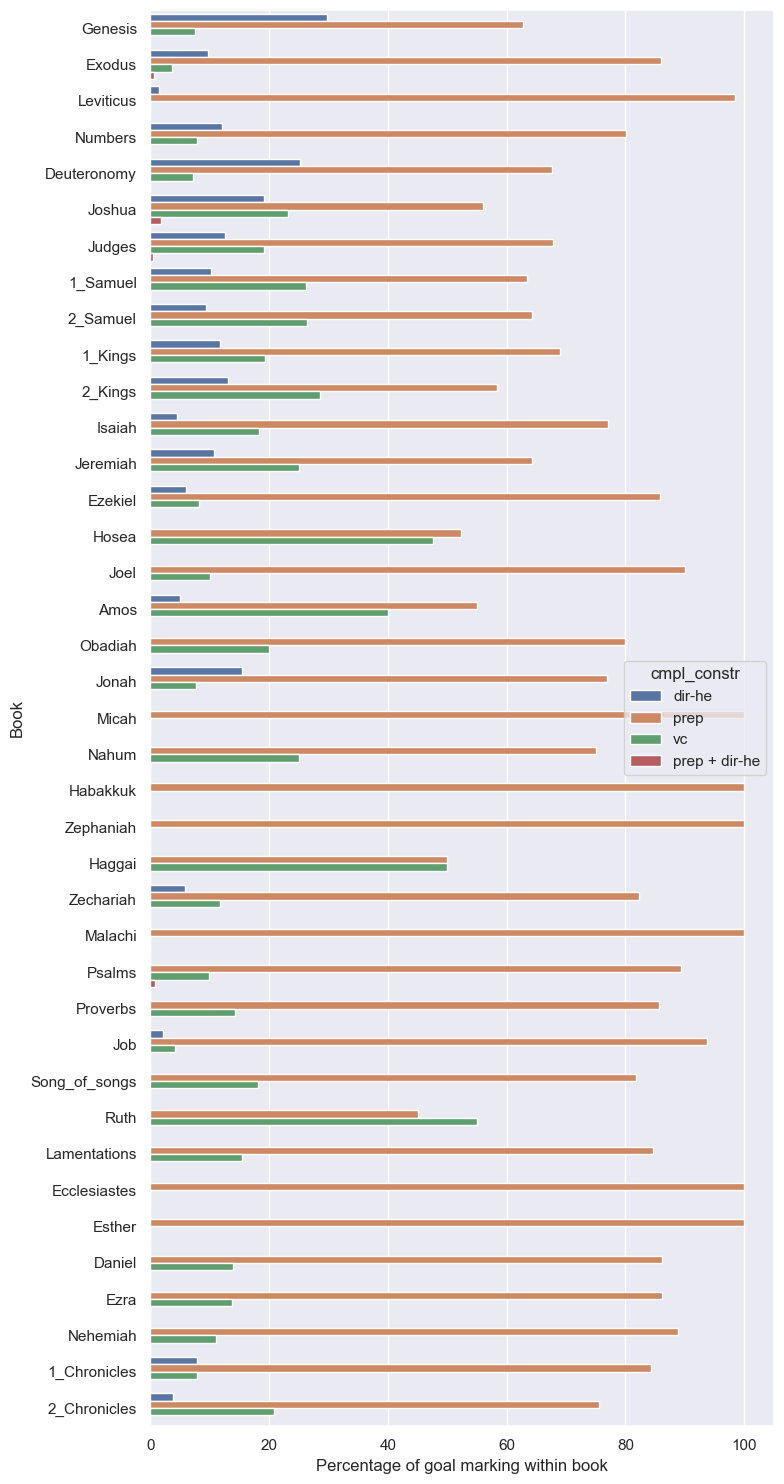

In [46]:
plt.figure(figsize=(8, 15))
sns.barplot(
    data=df_pct,
    y="book", 
    x="pct",
    hue="cmpl_constr",
    estimator=sum, 
    errorbar=None,
    dodge=True
)
plt.ylabel("Book")
plt.xlabel("Percentage of goal marking within book")
plt.legend(title="cmpl_constr")
plt.tight_layout()

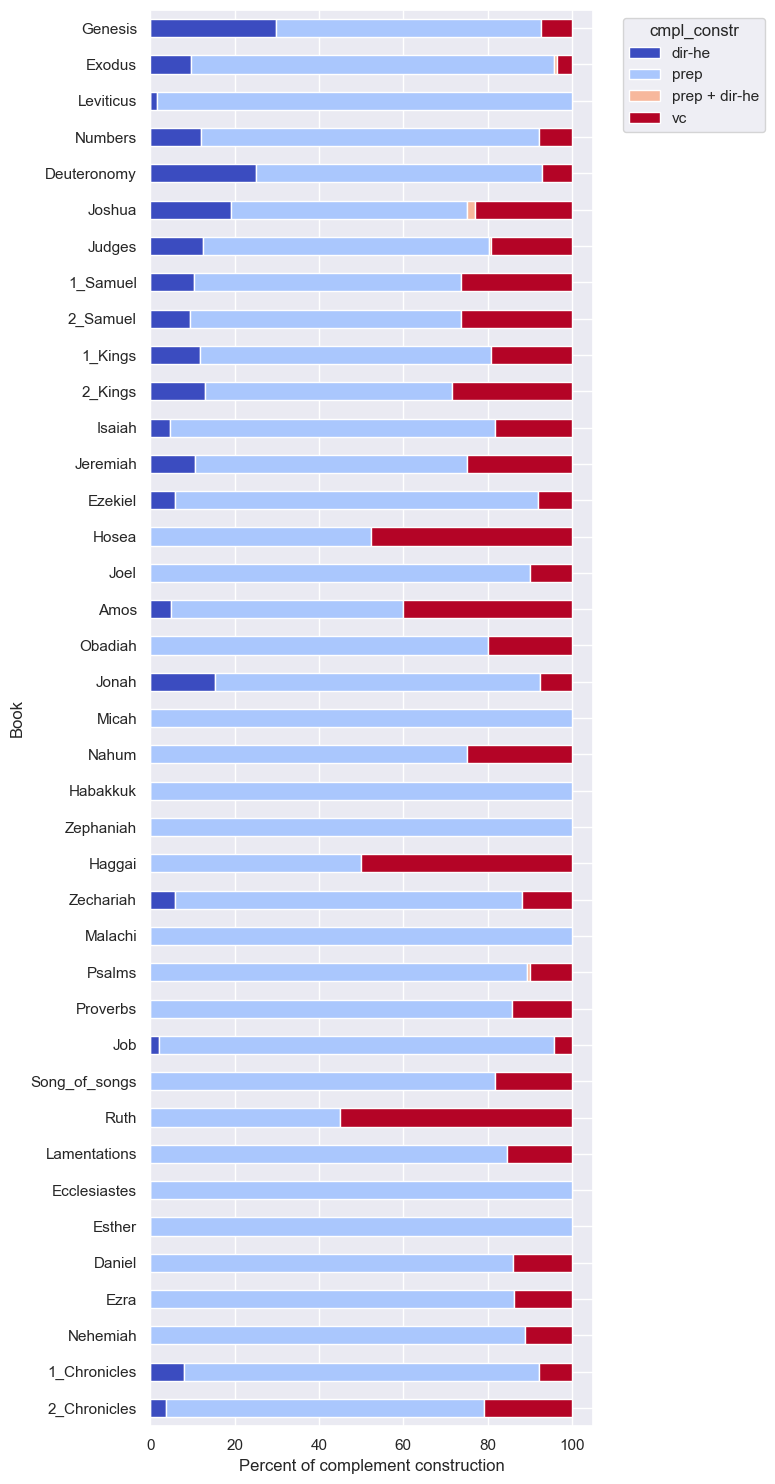

In [60]:
pivot = df_pct.pivot(index="book", columns="cmpl_constr", values="pct").fillna(0)

pivot = pivot.loc[::-1] # present books in expected order

pivot.plot(kind="barh", stacked=True, figsize=(8, 15), colormap="coolwarm")
plt.xlabel("Percent of complement construction")
plt.ylabel("Book")
plt.legend(title="cmpl_constr", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()